In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path as op
import seaborn as sns
from nilearn import surface
import pingouin
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Helvetica'


bids_folder = '/data/ds-numrisk/'

/Users/gdehol/mambaforge/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
neural_results = pd.read_csv(op.join(bids_folder, 'derivatives', 'summary_data', 'neural_results_aug2021.tsv'), sep='\t')
neural_results = neural_results.set_index(['type', 'subject', 'mask'])
neural_results['log(neural precision)'] = np.log(neural_results['neural precision'])


behav = pd.read_csv(op.join(bids_folder, 'derivatives', 'summary_data', 'riskPrecision_data.csv')).set_index('subject')
behav.index = behav.index.astype(int)

In [3]:
from pandas import IndexSlice as ix_

In [4]:
formiguel = neural_results.loc[ix_['trialwise', :, ['NPC', 'NPC_L', 'NPC_R']], :].unstack('mask')[['neural precision', 'slope']]


# formiguel.to_csv(op.join(bids_folder, 'derivatives' 'summary_data/miguel_aug2021.csv')

In [5]:
df = behav.join(neural_results)

In [12]:
neural_results

mag_prec  mag_noise3  riskprec_sym  riskprec_coin  \
type      subject mask                                                        
runwise   1       NPC      3.46227     0.20423       5.99275           3.45   
                  NPC1     3.46227     0.20423       5.99275           3.45   
                  NPC1_L   3.46227     0.20423       5.99275           3.45   
                  NPC1_R   3.46227     0.20423       5.99275           3.45   
                  NPC_L    3.46227     0.20423       5.99275           3.45   
...                            ...         ...           ...            ...   
trialwise 64      NPC1     2.81812     0.25091       1.96890           2.32   
                  NPC1_L   2.81812     0.25091       1.96890           2.32   
                  NPC1_R   2.81812     0.25091       1.96890           2.32   
                  NPC_L    2.81812     0.25091       1.96890           2.32   
                  NPC_R    2.81812     0.25091       1.96890           2.32   

                          riskprec_pool  risknoise_sym  risknoise_coin  \
type      subject mask                                                   
runwise   1       NPC              3.97        0.11799           0.205   
                  NPC1             3.97        0.11799           0.205   
                  NPC1_L           3.97        0.11799           0.205   
                  NPC1_R           3.97        0.11799           0.205   
                  NPC_L            3.97        0.11799           0.205   
...                                 ...            ...             ...   
trialwise 64      NPC1             2.10        0.35914           0.304   
                  NPC1_L           2.10        0.35914           0.304   
                  NPC1_R           2.10        0.35914           0.304   
                  NPC_L            2.10        0.35914           0.304   
                  NPC_R            2.10        0.35914           0.304   

                          risknoise_pool  rnp_sym  rnp_coin  ...  \
type      subject mask                                       ...   
runwise   1       NPC              0.178  0.56935   0.46163  ...   
                  NPC1             0.178  0.56935   0.46163  ...   
                  NPC1_L           0.178  0.56935   0.46163  ...   
                  NPC1_R           0.178  0.56935   0.46163  ...   
                  NPC_L            0.178  0.56935   0.46163  ...   
...                                  ...      ...       ...  ...   
trialwise 64      NPC1             0.337  0.22387   0.20472  ...   
                  NPC1_L           0.337  0.22387   0.20472  ...   
                  NPC1_R           0.337  0.22387   0.20472  ...   
                  NPC_L            0.337  0.22387   0.20472  ...   
                  NPC_R            0.337  0.22387   0.20472  ...   

                          precision_slope     slope  intercept    slope2  \
type      subject mask                                                     
runwise   1       NPC           -0.021611  0.034660   0.559166  0.003295   
                  NPC1          -0.005126  0.008076   0.283037  0.002682   
                  NPC1_L        -0.014422  0.018541   0.448332  0.003561   
                  NPC1_R         0.001249  0.005025   0.333358  0.023434   
                  NPC_L         -0.031329  0.028018   0.383687  0.024726   
...                                   ...       ...        ...       ...   
trialwise 64      NPC1           0.000003 -0.001328  33.730374  0.016149   
                  NPC1_L        -0.000180  0.139518  28.355052  0.033594   
                  NPC1_R        -0.001323  0.071590   8.683639  0.019101   
                  NPC_L          0.000020 -0.023857  34.191202  0.024641   
                  NPC_R         -0.001521  0.316336  16.203846  0.046526   

                          intercept2  log(neural precision)  slope/intercept  \
type      subject mask                                                         
r

In [13]:
tmp = df.xs('NPC_L', 0, 'mask').xs('trialwise', 0, 'type')

pingouin.corr(tmp['log(neural precision)'], tmp['mag_prec'])

,n,r,CI95%,p-val,BF10,power
pearson,64,0.297791,"[0.06, 0.51]",0.016854,2.546,0.6754


In [15]:
tmp = df.xs('NPC_R', 0, 'mask').xs('trialwise', 0, 'type')

pingouin.corr(tmp['log(neural precision)'], tmp['mag_prec'])

,n,r,CI95%,p-val,BF10,power
pearson,64,0.404148,"[0.18, 0.59]",0.000926,33.236,0.920791


In [6]:
df['slope/intercept'] = df['slope'] / df['intercept']
df['slope2/intercept2'] = df['slope2'] / df['intercept2']
df['log(sd)'] = np.log(df['sd'])
df['log(mutual information)'] = np.log(df['mutual information'])

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
sns.set_context('talk')
# sns.set(font_scale = 1., style='ticks')


/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


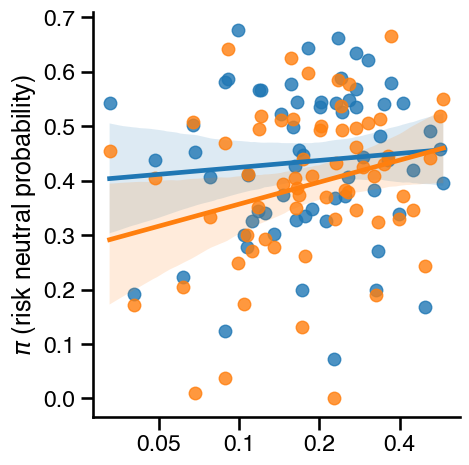

In [18]:
tmp = df.query('(mask in ["NPC_R"]) & (type == "trialwise")').reset_index()

tmp['mask'] = tmp['mask'].map({'NPC_L':'Left NPC', 'NPC_R':'Right NPC'})
tmp['log(slope)'] = np.log(tmp['slope'])



tmp = tmp.set_index(['subject', 'slope', 'sd', 'log(sd)', 'log(slope)', 'log(neural precision)'])[['rnp_coin', 'rnp_sym']]
tmp.columns = ['Coins', 'Symbolic numbers']
tmp.columns.name = 'Stimulus format'
sns.lmplot(x='log(neural precision)', y='Risk neutral probability', 
           hue_order=['Symbolic numbers', 'Coins'],
           hue='Stimulus format', data=tmp.stack().to_frame('Risk neutral probability').reset_index(),
          legend=False)
# plt.xlim(-7, 0)
plt.xlabel('')

plt.xticks(np.log([.05, .1, .2, .4]), [.05, .1, .2, .4])

plt.tight_layout()
plt.ylabel('$\pi$ (risk neutral probability)')

plt.savefig('/Users/gdehol/Dropbox/Science/numerosity_risk/paper/figures/brainbehavior/rnp_np.pdf', 
            transparent=False,
           bbox_inches=None)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


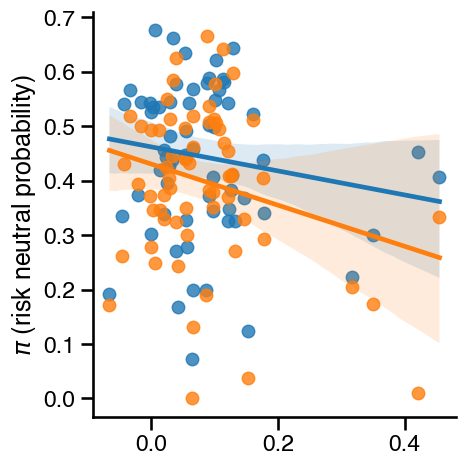

In [22]:
tmp = df.query('(mask in ["NPC_R"]) & (type == "trialwise")').reset_index()

tmp['mask'] = tmp['mask'].map({'NPC_L':'Left NPC', 'NPC_R':'Right NPC'})
tmp['log(slope)'] = np.log(tmp['slope'])

# tmp = tmp[tmp['slope'] < .3]

tmp = tmp.set_index(['subject', 'slope', 'sd', 'log(sd)', 'log(slope)', 'neural precision'])[['rnp_coin', 'rnp_sym']]
tmp.columns = ['Coins', 'Symbolic numbers']
tmp.columns.name = 'Stimulus format'
fac = sns.lmplot(x='slope', y='Risk neutral probability', 
           hue_order=['Symbolic numbers', 'Coins'],
                 robust=True,
           hue='Stimulus format', data=tmp.stack().to_frame('Risk neutral probability').reset_index(),
          legend=False)
# plt.xlim(-.1, .4)
# fac.set(xscale='log')
plt.xlabel('')
plt.ylabel('$\pi$ (risk neutral probability)')

plt.tight_layout()

plt.savefig('/Users/gdehol/Dropbox/Science/numerosity_risk/paper/figures/brainbehavior/rnp_dm.pdf', 
            transparent=False,
           bbox_inches=None)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


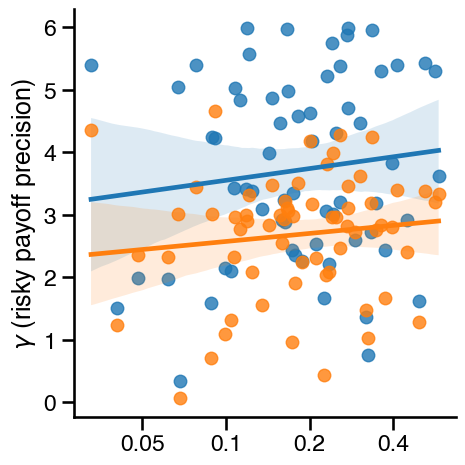

In [29]:
tmp = df.query('(mask in ["NPC_R"]) & (type == "trialwise")').reset_index()


tmp['log(slope)'] = np.log(tmp['slope'])

tmp = tmp.set_index(['subject', 'slope', 'sd', 'log(sd)', 'log(slope)', 'log(neural precision)'])[['riskprec_coin', 'riskprec_sym']]
tmp.columns = ['Coins', 'Symbolic numbers']
tmp.columns.name = 'Stimulus format'


sns.lmplot(x='log(neural precision)', y='Risky choice precision', 
           hue_order=['Symbolic numbers', 'Coins'],
           hue='Stimulus format', data=tmp.stack().to_frame('Risky choice precision').reset_index(),
          legend=False)
# plt.xlim(-7, 0)

plt.xticks(np.log([.05, .1, .2, .4]), [.05, .1, .2, .4])

plt.xlabel('')
plt.ylabel('$\gamma$ (risky payoff precision)')

plt.tight_layout()
plt.savefig('/Users/gdehol/Dropbox/Science/numerosity_risk/paper/figures/brainbehavior/riskprec_np.pdf', 
            transparent=False,
           bbox_inches=None)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


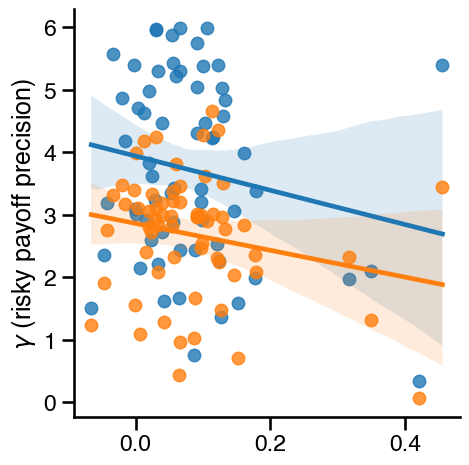

In [31]:
tmp = df.query('(mask in ["NPC_R"]) & (type == "trialwise")').reset_index()

tmp['mask'] = tmp['mask'].map({'NPC_L':'Left NPC', 'NPC_R':'Right NPC'})
tmp['log(slope)'] = np.log(tmp['slope'])



tmp = tmp.set_index(['subject', 'slope', 'sd', 'log(sd)', 'log(slope)', 'neural precision'])[['riskprec_coin', 'riskprec_sym']]
tmp.columns = ['Coins', 'Symbolic numbers']
tmp.columns.name = 'Stimulus format'
sns.lmplot(x='slope', y='Risky choice precision', 
           hue_order=['Symbolic numbers', 'Coins'],
           hue='Stimulus format', data=tmp.stack().to_frame('Risky choice precision').reset_index(),
          legend=False)
# # plt.xlim(-7, 0)
plt.xlabel('')
plt.tight_layout()
plt.ylabel('$\gamma$ (risky payoff precision)')


plt.savefig('/Users/gdehol/Dropbox/Science/numerosity_risk/paper/figures/brainbehavior/riskprec_slope.pdf', 
            transparent=False,
           bbox_inches=None)

/Users/gdehol/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='riskprec_coin', ylabel='Density'>

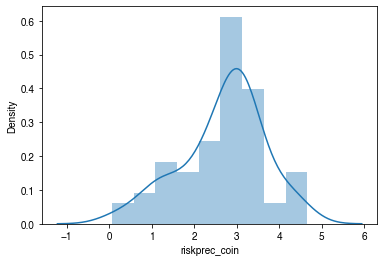

In [ ]:
sns.distplot(df['riskprec_coin'])

In [ ]:
df['Perceptual precision'] = df['mag_prec']

df['Risk precision (non-symbolic)'] = df['riskprec_coin']
df['Risk precision (symbolic)'] = df['riskprec_sym']

df['log(Risk precision (non-symbolic))'] = np.log(df['riskprec_coin'])
df['log(Risk precision (symbolic))'] = np.log(df['riskprec_sym'])

df['RNP (non-symbolic)'] = df['rnp_coin']
df['RNP (symbolic)'] = df['rnp_sym']

In [ ]:


neural_regressors = ['log(neural precision)', 'slope']

behavioral_regressors = ['Perceptual precision', 'Risk precision (non-symbolic)', 
                        'Risk precision (symbolic)', 'RNP (non-symbolic)',
                        'RNP (symbolic)',
                        'log(Risk precision (non-symbolic))',
                        'log(Risk precision (symbolic))']

In [ ]:
from itertools import product

# Pearson

In [ ]:
rs = []
keys = []

for br, nr in product(behavioral_regressors, neural_regressors):
    rs.append(pingouin.corr(df[br], df[nr], method='pearson').iloc[0])
    keys.append((br, nr))
    
rs = pd.concat(rs, keys=keys, names=['behavior', 'neural'])
rs = rs.unstack()[['r', 'p-val', 'BF10']].rename(columns={'p-val': 'p-val (two-sided)'})
rs.columns.name = 'parameter'
rs['p-val (one-sided)'] = rs['p-val (two-sided)'] / 2.
rs = rs.drop('p-val (two-sided)', 1)
rs = rs.stack().unstack(['neural', 'parameter'])

rs.astype(float).round(3)

<ipython-input-175-3d32d2bc2a46>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rs = rs.drop('p-val (two-sided)', 1)


neural                             Neural diminishing sensitivity         \
parameter                                                       r   BF10   
behavior                                                                   
Perceptual precision                                       -0.059  0.174   
RNP (non-symbolic)                                         -0.268  1.464   
RNP (symbolic)                                             -0.140  0.283   
Risk precision (non-symbolic)                              -0.213  0.633   
Risk precision (symbolic)                                  -0.180  0.420   
log(Risk precision (non-symbolic))                         -0.354  8.772   
log(Risk precision (symbolic))                             -0.295  2.423   

neural                                               log(neural precision)  \
parameter                          p-val (one-sided)                     r   
behavior                                                                     
Perceptual precision                           0.320                 0.404   
RNP (non-symbolic)                             0.016                 0.258   
RNP (symbolic)                                 0.135                 0.085   
Risk precision (non-symbolic)                  0.045                 0.122   
Risk precision (symbolic)                      0.077                 0.118   
log(Risk precision (non-symbolic))             0.002                 0.190   
log(Risk precision (symbolic))                 0.009                 0.151   

neural                                                        
parameter                             BF10 p-val (one-sided)  
behavior                                                      
Perceptual precision                33.236             0.000  
RNP (non-symbolic)                   1.247             0.020  
RNP (symbolic)                       0.194             0.251  
Risk precision (non-symbolic)        0.244             0.169  
Risk precision (symbolic)            0.238             0.177  
log(Risk precision (non-symbolic))   0.469             0.067  
log(Risk precision (symbolic))       0.311             0.117

In [ ]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'